## Загрузка данных

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [19]:
data = pd.read_csv('/Users/yumo/Desktop/sakh_invest.csv', dtype=float)

In [20]:
data

,year,ecological_index,gas,oil,marine_products,wood,population,human_resource,natural_increase,migration_increase,grp,grp_per_capita,num_ie,ipi,fixed_assets,electricity,urban_environment,roads_lenth,internet_access,investment
0,2018.0,46.0,26400000.0,15700000.0,674181.0,663.90,488300.0,327800.0,-219.0,-324.0,1233164.7,2517125.0,13544.0,104.9,3170137.0,4516.4,152.0,2323.2,77.5,229594.8
1,2019.0,50.0,26534902.0,17268664.0,656498.0,663.12,489638.0,332200.0,-324.0,-1057.0,1172226.1,2397445.2,14080.0,102.8,3523653.0,4652.4,160.0,2441.7,82.6,238383.7
2,2020.0,52.0,28022596.0,15757999.0,703161.0,662.77,488257.0,327500.0,-1104.0,-1532.0,1001689.4,2057114.7,14580.0,96.9,4032622.0,4814.1,170.0,2689.6,84.8,230493.9
3,2021.0,56.0,26815484.0,13563265.0,629707.0,662.53,485621.0,336600.0,-2149.0,705.0,1237949.8,2647233.9,13008.0,88.6,4370008.0,4622.0,175.0,2843.8,85.5,241353.9
4,2022.0,56.0,26200000.0,9000000.0,776742.0,662.53,466009.0,335900.0,-1443.0,-4031.0,1530380.6,3303417.0,12716.0,76.8,3749776.0,4681.9,188.0,2873.6,88.7,269276.1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5 non-null      float64
 1   ecological_index    5 non-null      float64
 2   gas                 5 non-null      float64
 3   oil                 5 non-null      float64
 4   marine_products     5 non-null      float64
 5   wood                5 non-null      float64
 6   population          5 non-null      float64
 7   human_resource      5 non-null      float64
 8   natural_increase    5 non-null      float64
 9   migration_increase  5 non-null      float64
 10  grp                 5 non-null      float64
 11  grp_per_capita      5 non-null      float64
 12  num_ie              5 non-null      float64
 13  ipi                 5 non-null      float64
 14  fixed_assets        5 non-null      float64
 15  electricity         5 non-null      float64
 16  urban_enviro

In [22]:
to_int = ['year', 'gas', 'oil', 'marine_products', 'population', 
          'human_resource', 'natural_increase', 'migration_increase', 
          'num_ie', 'fixed_assets', 'urban_environment'
         ]

for i in to_int:
    data[i] = data[i].astype(int)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5 non-null      int64  
 1   ecological_index    5 non-null      float64
 2   gas                 5 non-null      int64  
 3   oil                 5 non-null      int64  
 4   marine_products     5 non-null      int64  
 5   wood                5 non-null      float64
 6   population          5 non-null      int64  
 7   human_resource      5 non-null      int64  
 8   natural_increase    5 non-null      int64  
 9   migration_increase  5 non-null      int64  
 10  grp                 5 non-null      float64
 11  grp_per_capita      5 non-null      float64
 12  num_ie              5 non-null      int64  
 13  ipi                 5 non-null      float64
 14  fixed_assets        5 non-null      int64  
 15  electricity         5 non-null      float64
 16  urban_enviro

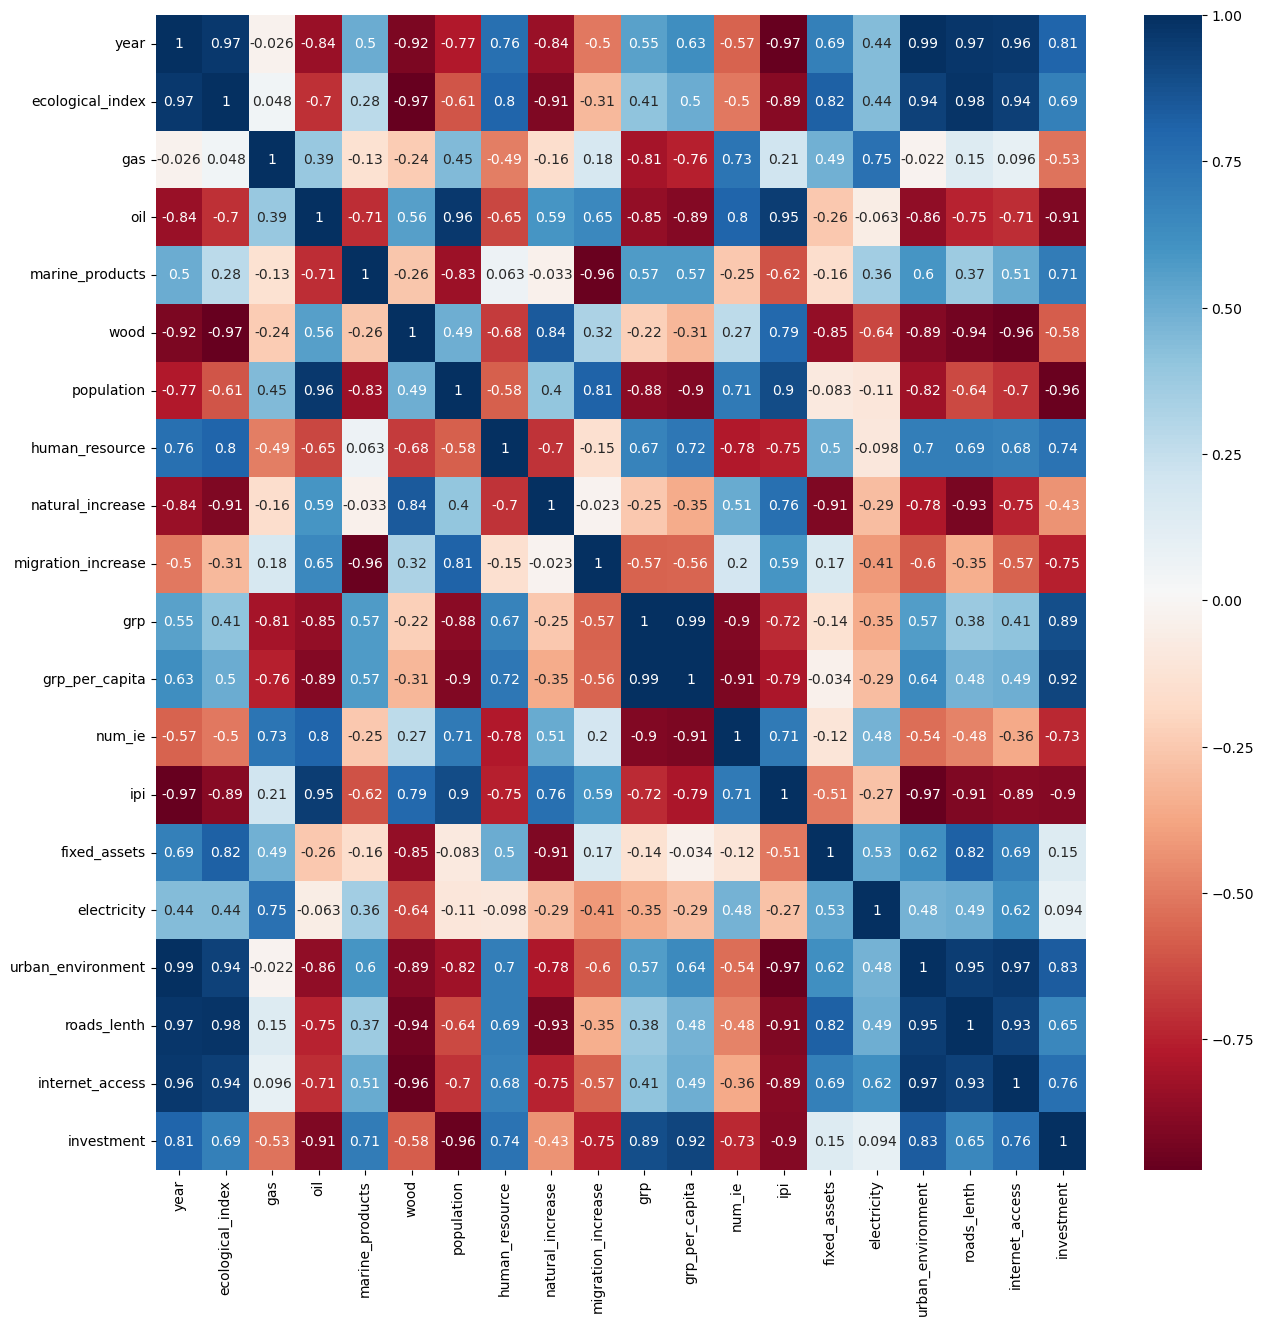

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, cmap='RdBu')

plt.show()

## Предобработка, обучение и тестирование

In [24]:
features = data.drop('investment', axis=1)
target = data.investment

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, 
                                                                            test_size=.25,
                                                                            random_state=12345)

for i in [features_train, features_test, target_train, target_test]:
    print(i.shape)

(3, 19)
(2, 19)
(3,)
(2,)


## Модели

### Линейная регрессия

#### Обучение

In [25]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_train)
        
rmse_lr = mean_squared_error(target_train, predictions) ** .5

In [26]:
print('RMSE линейной регрессии =', rmse_lr)

RMSE линейной регрессии = 1.6803104348644432e-11


#### Тестирование

In [27]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
        
rmse_lr_test = mean_squared_error(target_test, predictions) ** .5
print('RMSE линейной регресии на тестовой выборке =', rmse_lr_test)

RMSE линейной регресии на тестовой выборке = 15067.491964879326


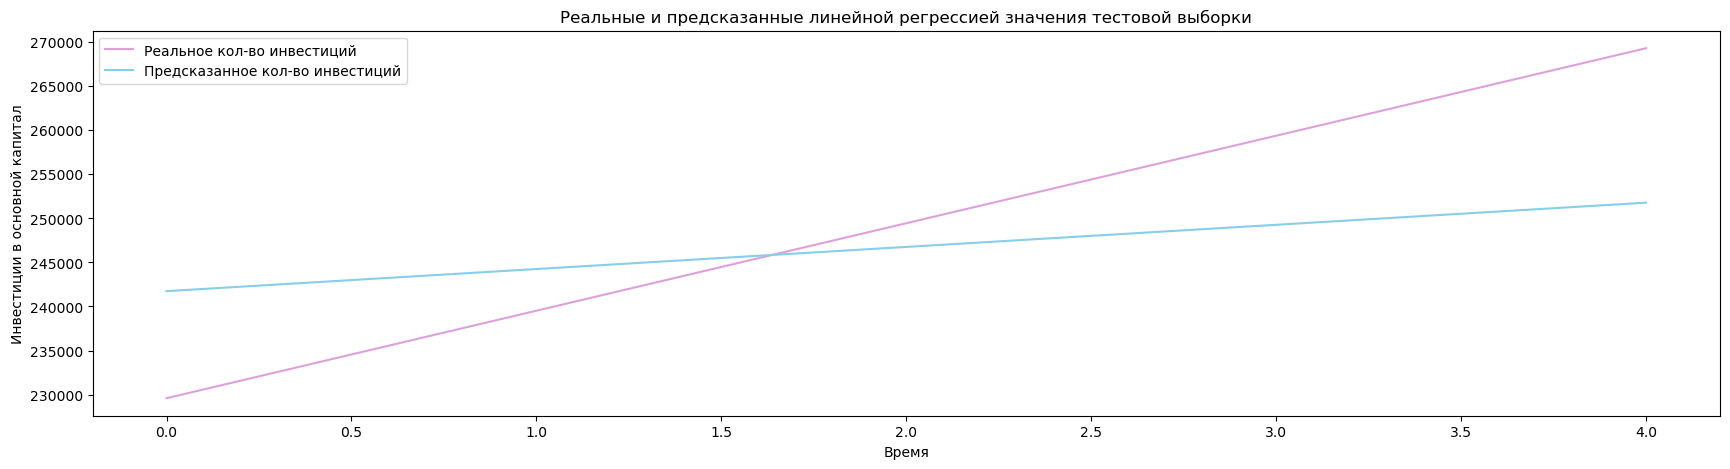

In [28]:
figsize = (21,5)

fig, ax = plt.subplots(figsize = figsize)
ax.plot(target_test.index, target_test, label='Реальное кол-во инвестиций', color = 'plum')
ax.plot(target_test.index, predictions, label='Предсказанное кол-во инвестиций', color = 'skyblue')
plt.title('Реальные и предсказанные линейной регрессией значения тестовой выборки')
plt.xlabel('Время')
plt.ylabel('Инвестиции в основной капитал')
plt.legend()
plt.show()

### Дерево решений

#### Обучение

In [29]:
best_rmse_dt = 10000

for max_depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth = max_depth, random_state = 12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_train)
        
    rmse_dt = mean_squared_error(target_train, predictions) ** .5
    
    if rmse_dt < best_rmse_dt and rmse_dt > 0:
        best_rmse_dt = rmse_dt
        best_max_depth = max_depth
            
print('RMSE дерева решений =', best_rmse_dt,'при глубине', best_max_depth)

RMSE дерева решений = 1212.5790723357588 при глубине 1


#### Тестирование

In [30]:
model = DecisionTreeRegressor(max_depth = best_max_depth, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
        
rmse = mean_squared_error(target_test, predictions) ** .5

print('RMSE дерева решений на тестовой выборке =', rmse)

RMSE дерева решений на тестовой выборке = 22026.62444962913


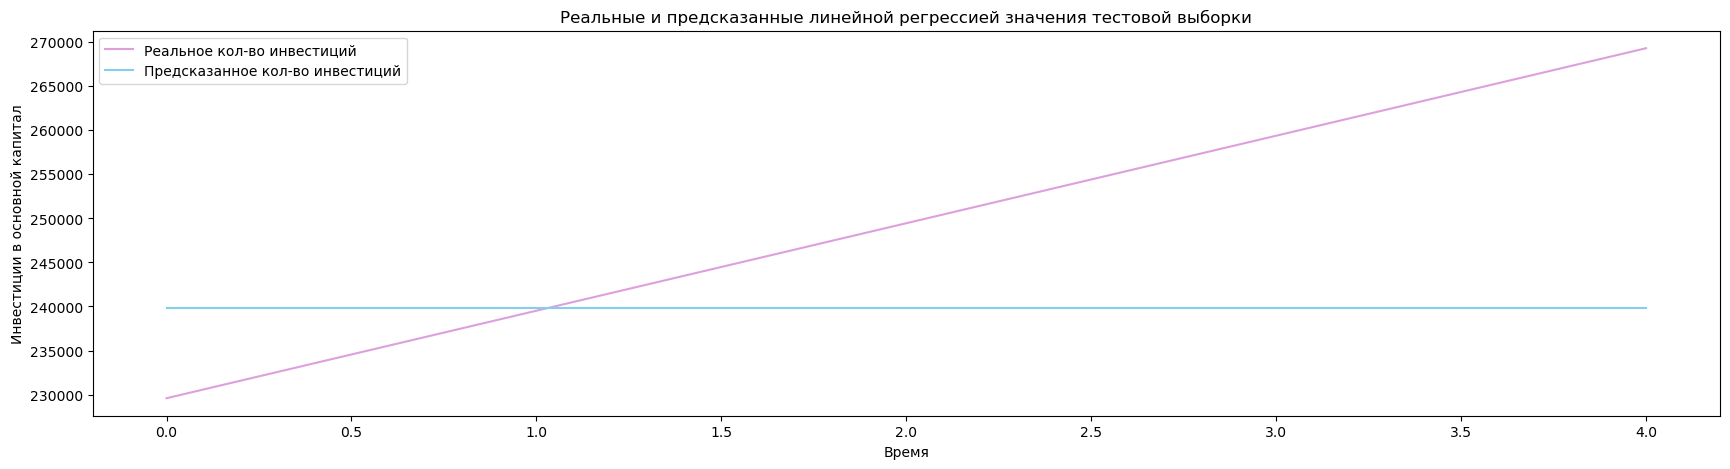

In [31]:
fig, ax = plt.subplots(figsize = figsize)
ax.plot(target_test.index, target_test, label='Реальное кол-во инвестиций', color = 'plum')
ax.plot(target_test.index, predictions, label='Предсказанное кол-во инвестиций', color = 'skyblue')
plt.title('Реальные и предсказанные линейной регрессией значения тестовой выборки')
plt.xlabel('Время')
plt.ylabel('Инвестиции в основной капитал')
plt.legend()
plt.show()